## 1차 과제

- 데이터: 2018 사교육비 총조사

https://mdis.kostat.go.kr/ofrData/selectOfrDataDetail.do?survId=95&itmDiv=1&nPage=3&itemId=2008&itemNm=

- 제출 양식: 이름_n차_과제.ipynb
- 사용 라이브러리: pandas, numpy, matplotlib, seaborn, OneHotEncoder

**코드형태로 되어 있는 컬럼의 경우 파일설계서를 참고하시기 바랍니다.**

### 1. 데이터 불러오기

1.1 사용할 라이브러리와 데이터를 불러오고 앞 10개의 데이터만 출력하세요.

In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import seaborn as sns
import itertools
import os
%matplotlib inline

plt.rcParams['font.family'] = 'Malgun Gothic'
style.use('seaborn-poster')
style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

#최대 500으로 설정
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False) #확장된 프레임 비 활성화

In [351]:
research = pd.read_csv("./사교육비조사.csv", encoding="cp949")

In [352]:
research.head(10)

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
0,1,11,1,1,0.333333,0.0,6.333333,4.333333,2.000000,392.236071,2,NaN,51.0,31.0,1.0,5,1.0
1,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,51.0,41.0,3.0,3,1.0
2,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,61.0,51.0,1.0,6,1.0
3,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,2,NaN,64.0,51.0,3.0,8,1.0
4,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,188.862467,3,NaN,51.0,51.0,3.0,4,1.0
5,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,23.607808,2,NaN,71.0,51.0,1.0,4,3.0
6,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,39.619805,2,NaN,51.0,41.0,1.0,2,1.0
7,1,11,1,1,0.666667,0.0,1.000000,1.000000,0.000000,64.921473,1,NaN,31.0,31.0,1.0,2,1.0
8,1,11,1,1,0.666667,0.0,1.333333,0.000000,1.333333,118.039042,1,NaN,51.0,51.0,1.0,3,8.0
9,1,11,1,1,0.666667,0.0,10.333333,10.333333,0.000000,360.806005,3,NaN,41.0,51.0,3.0,2,1.0


1.2 불러온 데이터의 요약 정보를 출력하세요.

In [353]:
research.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75785 entries, 0 to 75784
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역구분코드        75785 non-null  int64  
 1   행정구역시도코드      75785 non-null  int64  
 2   학교급구분코드       75785 non-null  int64  
 3   방과후학교참여여부     75785 non-null  int64  
 4   방과후학교참여시간수    75785 non-null  float64
 5   EBS교재비        75785 non-null  float64
 6   사교육참여시간수      75785 non-null  float64
 7   일반교과사교육시간수    75785 non-null  float64
 8   예체능사교육시간수     75785 non-null  float64
 9   사교육비총비용       75785 non-null  float64
 10  총자녀수          75785 non-null  int64  
 11  학생성적구분코드      36479 non-null  float64
 12  부_교육정도코드      71582 non-null  float64
 13  모_교육정도코드      72712 non-null  float64
 14  부모경제활동코드      75440 non-null  float64
 15  월평균가구소득코드     75785 non-null  int64  
 16  진학희망고등학교유형코드  39306 non-null  float64
dtypes: float64(11), int64(6)
memory usage: 9.8 MB


1.2 데이터의 기술통계량을 출력하세요.

In [354]:
research.describe()

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
count,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,36479.000000,71582.000000,72712.000000,75440.000000,75785.000000,39306.000000
mean,2.626654,27.592188,2.309006,1.453982,2.609993,3.599502,5.669939,4.002366,1.607508,346.718328,2.163766,3.178486,43.391872,41.457572,2.287354,4.298080,1.958709
std,0.955592,8.542575,0.947334,0.497881,3.764333,9.634226,6.230053,5.357766,3.557269,407.001971,0.721118,1.248837,11.510979,10.592290,0.950272,2.116495,1.578397
min,1.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,8.000000,1.000000,1.000000,1.000000
25%,2.000000,22.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,31.000000,31.000000,1.000000,3.000000,1.000000
50%,3.000000,31.000000,2.000000,1.000000,1.000000,0.000000,4.000000,1.000000,0.000000,236.078084,2.000000,3.000000,41.000000,41.000000,3.000000,4.000000,1.000000
75%,3.000000,35.000000,3.000000,2.000000,4.000000,0.000000,10.000000,7.000000,1.666667,563.046231,3.000000,4.000000,51.000000,51.000000,3.000000,6.000000,3.000000
max,4.000000,39.000000,4.000000,2.000000,40.000000,198.260065,82.333333,76.000000,60.000000,5374.156458,11.000000,5.000000,75.000000,75.000000,4.000000,8.000000,8.000000


### 2. EDA 및 전처리

2.1 해당 데이터는 초중고 학생이 모두 들어있는 데이터로 보다 명확한 분석을 위해 고등학생만을 대상으로 분석합니다.

이를 위해 학교급구분코드가 3(고등학생)인 데이터만 남기도록 하고 몇개의 데이터가 남았는지 확인 후 학교급구분코드 컬럼을 삭제하세요.

In [355]:
highschool = research[research['학교급구분코드'] == 3]

In [356]:
highschool.head()

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,1,11,3,1,0.333333,0.0,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
4921,1,11,3,1,0.333333,0.0,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
4922,1,11,3,1,0.333333,0.0,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
4923,1,11,3,1,0.333333,0.0,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4924,1,11,3,1,0.333333,0.0,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN


In [357]:
highschool.shape

(30052, 17)

2.2 지역구분코드와 행정구역시도코드를 삭제하세요(분석에 필요할 것으로 보이나 현재는 편의상 삭제).

In [358]:
highschool.drop(['지역구분코드', '행정구역시도코드'], axis = 1, inplace = True)

In [359]:
highschool.shape

(30052, 15)

2.3 방과후학교참여여부에 속한 값들의 개수를 확인하고 One Hot Encoding을 통해 1과 2를 각각 참여, 미참여의 dummy variable로 만드세요.

In [360]:
highschool['방과후학교참여여부'].value_counts()

1    18498
2    11554
Name: 방과후학교참여여부, dtype: int64

In [361]:
after_school = pd.get_dummies(highschool['방과후학교참여여부'], prefix='방과후학교참여')
highschool = highschool.join(after_school)
highschool.drop('방과후학교참여여부', axis=1, inplace=True)

In [362]:
highschool.head()

,학교급구분코드,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후학교참여_1,방과후학교참여_2
4920,3,0.333333,0.0,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,1,0
4921,3,0.333333,0.0,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,1,0
4922,3,0.333333,0.0,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,1,0
4923,3,0.333333,0.0,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,1,0
4924,3,0.333333,0.0,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,1,0


In [363]:
highschool.rename(columns={'방과후학교참여_1': "방과후참여",
                           '방과후학교참여_2' : "방과후미참여"}, inplace=True)

In [364]:
highschool.head(5)

,학교급구분코드,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후참여,방과후미참여
4920,3,0.333333,0.0,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,1,0
4921,3,0.333333,0.0,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,1,0
4922,3,0.333333,0.0,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,1,0
4923,3,0.333333,0.0,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,1,0
4924,3,0.333333,0.0,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,1,0


2.4 EBS교재비의 경우 0값이 절반 이상이므로 모델 성능에 영향을 미칠 수 있기에 삭제하겠습니다.

In [365]:
highschool.drop('EBS교재비',axis = 1, inplace=True)

In [366]:
highschool.head()

,학교급구분코드,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후참여,방과후미참여
4920,3,0.333333,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,1,0
4921,3,0.333333,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,1,0
4922,3,0.333333,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,1,0
4923,3,0.333333,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,1,0
4924,3,0.333333,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,1,0


2.5 학생성적구분코드에 따른 사교육비총비용의 분포를 BoxPlot으로 나타내세요.

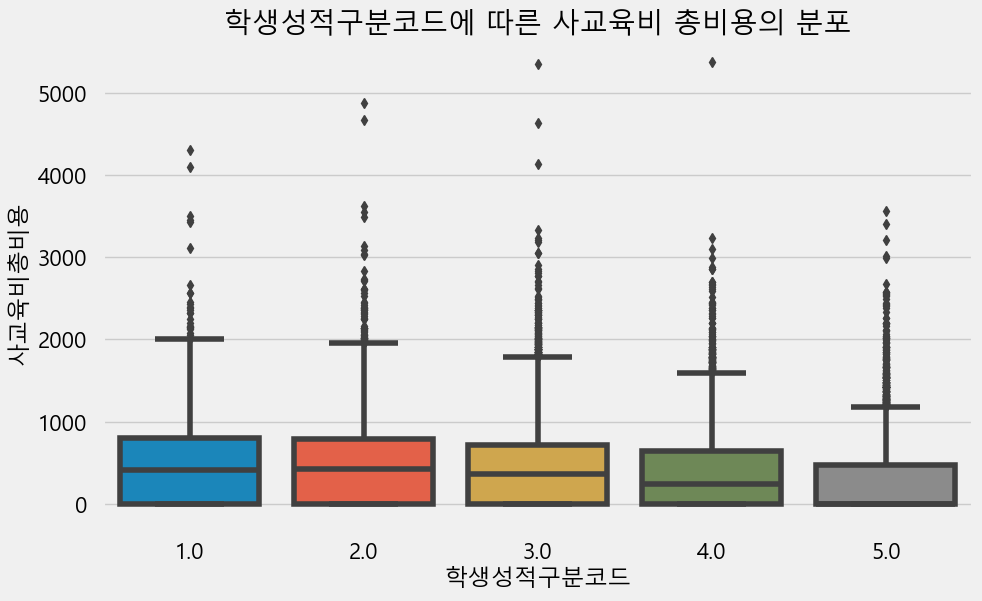

In [367]:
plt.figure(figsize=(10,6))
sns.boxplot(x='학생성적구분코드', y='사교육비총비용', data=highschool)
plt.title('학생성적구분코드에 따른 사교육비 총비용의 분포')
plt.xlabel('학생성적구분코드')
plt.ylabel('사교육비총비용')

plt.show()

2.6 학생성적구분코드에 속한 값들의 밸런스를 확인해봤을 때 중위값이 과도하게 많으므로 1, 2를 상위, 4, 5를 하위로 묶은 후 One Hot Encoding을 통해 dummy variable로 변환하세요.

In [368]:
highschool['학생성적구분코드'].value_counts()

3.0    9032
2.0    6079
4.0    6020
5.0    5813
1.0    3108
Name: 학생성적구분코드, dtype: int64

In [369]:
grade_map = {1: '성적상위', 2: "성적상위", 3: "성적중위", 4: "성적하위", 5: "성적하위"}
highschool['학생성적구분'] = highschool['학생성적구분코드'].map(grade_map)

In [370]:
highschool.head()

,학교급구분코드,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후참여,방과후미참여,학생성적구분
4920,3,0.333333,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,1,0,성적상위
4921,3,0.333333,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,1,0,성적중위
4922,3,0.333333,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,1,0,성적하위
4923,3,0.333333,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,1,0,성적하위
4924,3,0.333333,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,1,0,성적하위


2.7 Label Encoding과 One Hot Encoding의 차이에 대해 서술하세요.

A: label encoding과 one hot encoding의 큰 차이는 데이터의 값의 숫자의 크기나 순서에 의미가 들어가는지의 여부입니다.

- one hot encoding은 새로운 이진열을 만듭니다. 각 범주에 대해 하나의 열이 생성되고 ,참인 값은 1 참이 아닌 값은 0으로 정해지게 됩니다. 서로의 독립성을 인정하여 표현을 하는데 중요하지만, 칼럼이 많아지면 데이터셋의 차원이 증가하여 차원의 저주 문제가 발생할 수 있다는 단점입니다.

- label encoding은 각 범주를 단순히 숫자로 변환합니다. ex) 바나나- 3 / 사과 - 2 / 포도 - 1 이렇게 변화된 데이터는 새로운 칼럼을 생성시키지도 않고 바로 학습을 돌리는데 용이합니다. 다만, 수치에 순서 or 크기가 생기기 때문에 잘 못된 의미를 부여할 수 있습니다. 바나나, 사과, 포도는 동일한 과일 품목인데 포도는 1의 값, 바나나는 3의 값을 가지고 있어 크기가 부여가 되어 관계를 잘못 학습할 위험성이 있습니다.





2.8 dummy variable로 변환된 기존 변수와 dummy variable 중 하나를 삭제하겠습니다(다중공선성 문제).

In [371]:
highschool.drop('학생성적구분코드', axis=1, inplace=True)

2.9 다중공선성 문제가 무엇인지 작성하고 왜 이것이 One Hot Encoding의 dummy variable과 관련 있는지 작성하세요. 

A:다중공선성이랑 독립변수(X)간의 상관관계가 높을 때 문제가 발생합니다. 
- 다중공선성은 2개의 독립변수들이 비슷한 상관성을 가지고 있기 때문에, 다중공선성이 발생하는 방향쪽으로 값이 치우져질 수 있다는 단점이 있습니다.
one hot encoding된 변수들을 사용할 때는 항상 기준 범주를 설정한 후 다중공선성 문제를 회피해야합니다. 

## one hot encdoing과의 상관관계
- 예를 들어 '빨강', '초록', '파랑'이라는 값이 있고 이 값을 원핫인코딩을 진행합니다.
빨강 = 1 - ( 초록 + 파랑)

파랑 = 1 - ( 빨강 + 초록)

초록 = 1 - ( 빨강 + 파랑)

이렇게 2개의 값을 알고 있다면 나머지 값 1개도 알 수 있게 되는 "더미 변수 함정"에 빠지게 되어, 범주형 변수 1개를 삭제하고 진행합니다. 

[단, tree 모델에서는 다중공선성을 고려할 필요가 없음]

2.10 사교육참여시간수, 일반교과사교육시간수, 예체능사교육시간수의 상관 관계를 Heatmap으로 시각화하세요.

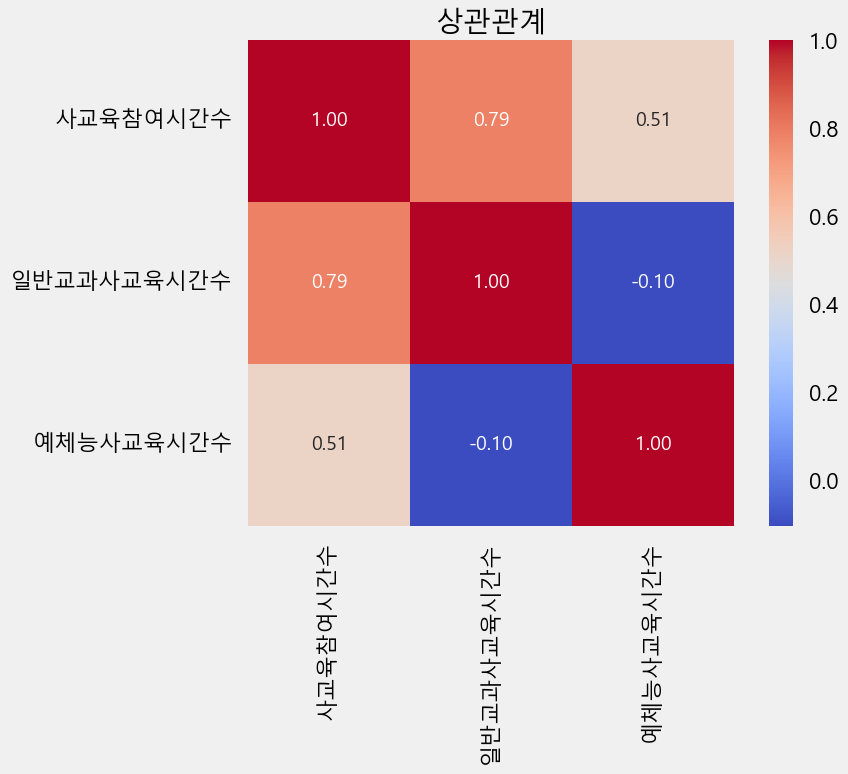

In [372]:
corr = highschool[['사교육참여시간수', '일반교과사교육시간수', '예체능사교육시간수']].corr()

# 히트맵 생성
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
'''
corr: 상관계수 행렬 나타냄.
annot: True일 시, 각 셀에 상관계수 값 표시
fmt: 숫자의 포맷 설정
cbar: 옆에 색상 막대기 표시
square: true 각 셀이 정사각형 모양 (false시 직사각형)

'''

plt.title("상관관계")

plt.show()

2.11 이후 자유롭게 데이터를 살펴보고 전처리를 진행하세요.

### 분석

3.1 전처리가 완료된 데이터를 통해 분석을 진행하세요.

- target variable은 사교육비총비용
- 최소 2개의 모델 사용
- 위에서 진행한 전처리 방식과 달라도 무방(단, 전처리 과정에 대한 서술 필요)

# 내 맘대로 분석 및 모델 학습

In [373]:
df = pd.read_csv("./사교육비조사.csv", encoding="cp949")

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75785 entries, 0 to 75784
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역구분코드        75785 non-null  int64  
 1   행정구역시도코드      75785 non-null  int64  
 2   학교급구분코드       75785 non-null  int64  
 3   방과후학교참여여부     75785 non-null  int64  
 4   방과후학교참여시간수    75785 non-null  float64
 5   EBS교재비        75785 non-null  float64
 6   사교육참여시간수      75785 non-null  float64
 7   일반교과사교육시간수    75785 non-null  float64
 8   예체능사교육시간수     75785 non-null  float64
 9   사교육비총비용       75785 non-null  float64
 10  총자녀수          75785 non-null  int64  
 11  학생성적구분코드      36479 non-null  float64
 12  부_교육정도코드      71582 non-null  float64
 13  모_교육정도코드      72712 non-null  float64
 14  부모경제활동코드      75440 non-null  float64
 15  월평균가구소득코드     75785 non-null  int64  
 16  진학희망고등학교유형코드  39306 non-null  float64
dtypes: float64(11), int64(6)
memory usage: 9.8 MB


In [375]:
df.columns

Index(['지역구분코드', '행정구역시도코드', '학교급구분코드', '방과후학교참여여부', '방과후학교참여시간수', 'EBS교재비', '사교육참여시간수', '일반교과사교육시간수', '예체능사교육시간수', '사교육비총비용', '총자녀수', '학생성적구분코드', '부_교육정도코드', '모_교육정도코드', '부모경제활동코드', '월평균가구소득코드', '진학희망고등학교유형코드'], dtype='object')

In [376]:
df.shape

(75785, 17)

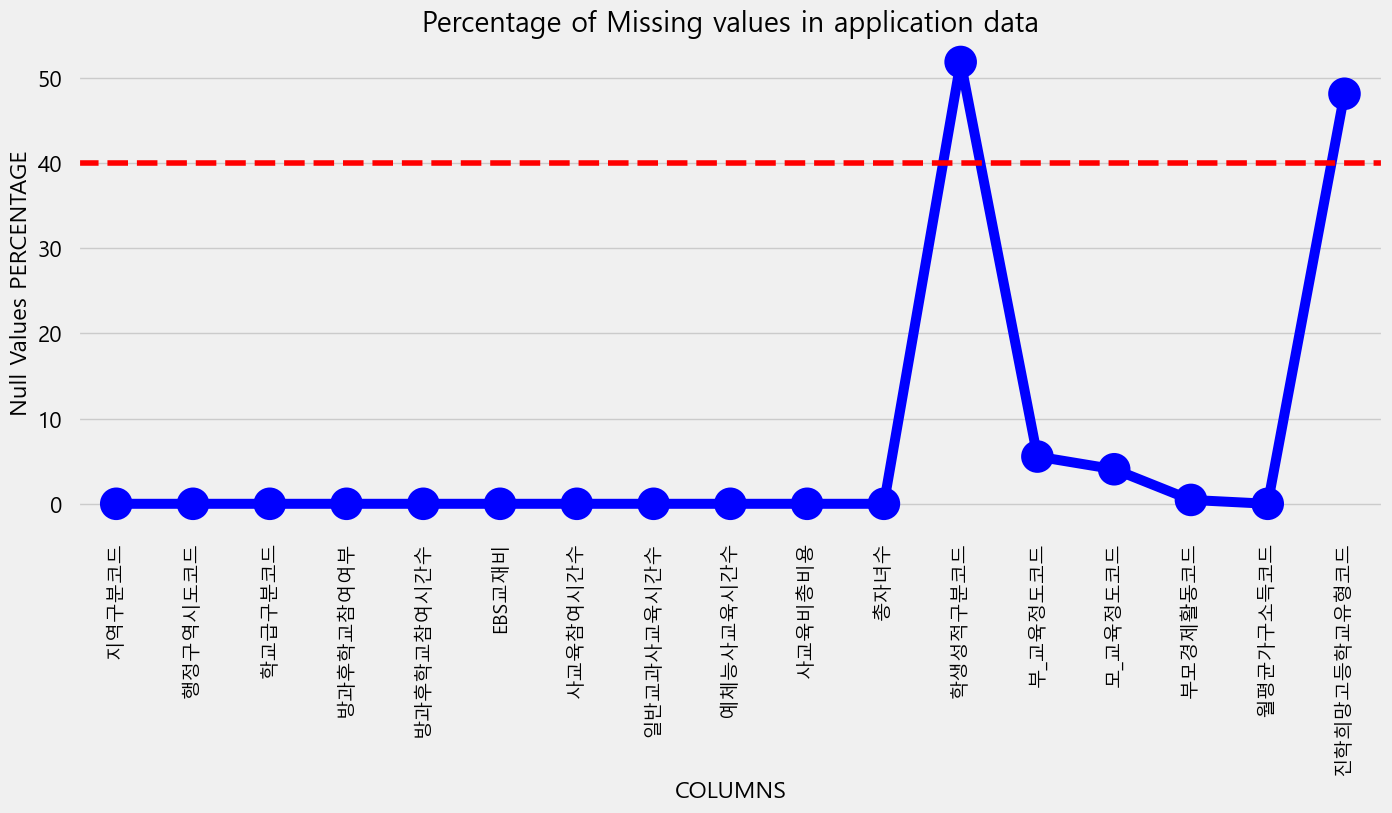

In [377]:
null_applicationDF = pd.DataFrame(df.isnull().sum() *  100 / df.shape[0]).reset_index()
null_applicationDF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize = (15,6))
ax = sns.pointplot(x="Column Name", y="Null Values Percentage", data = null_applicationDF, color = 'blue')
plt.xticks(rotation = 90, fontsize = 14)
ax.axhline(40, ls='--', color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

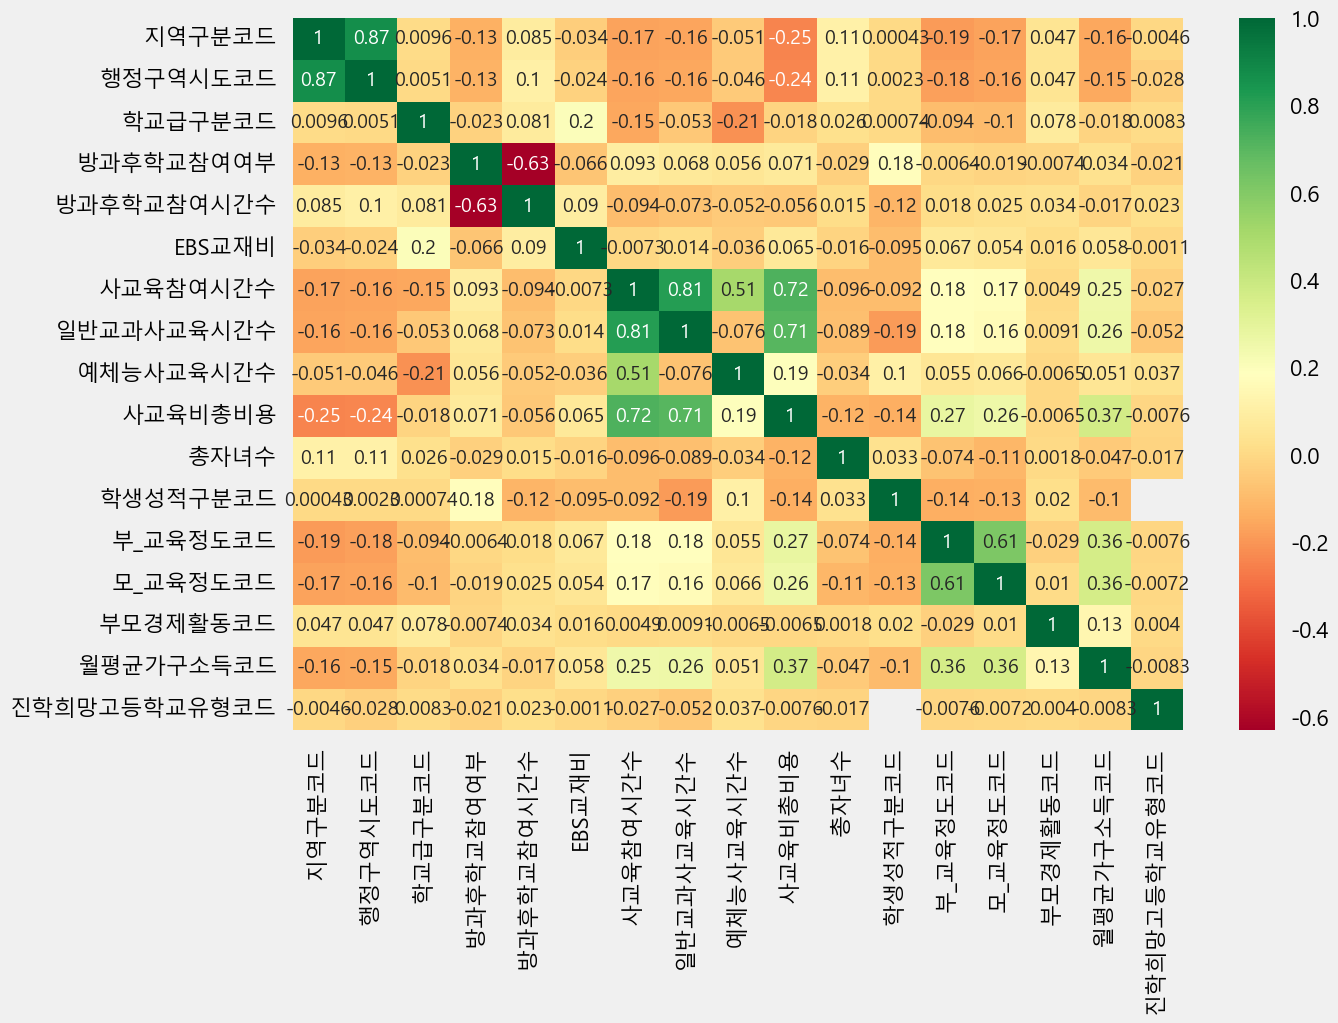

In [378]:
# 상관관계 분석 (EXT_SOURCE_X 열 VS Target column)
Source = df[['지역구분코드', '행정구역시도코드', '학교급구분코드', '방과후학교참여여부', '방과후학교참여시간수', 'EBS교재비', '사교육참여시간수', '일반교과사교육시간수', '예체능사교육시간수', '사교육비총비용', '총자녀수', '학생성적구분코드', '부_교육정도코드', '모_교육정도코드', '부모경제활동코드', '월평균가구소득코드', '진학희망고등학교유형코드']]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
                 xticklabels = source_corr.columns,
                 yticklabels=source_corr.columns,
                 annot = True,
                 cmap = "RdYlGn")

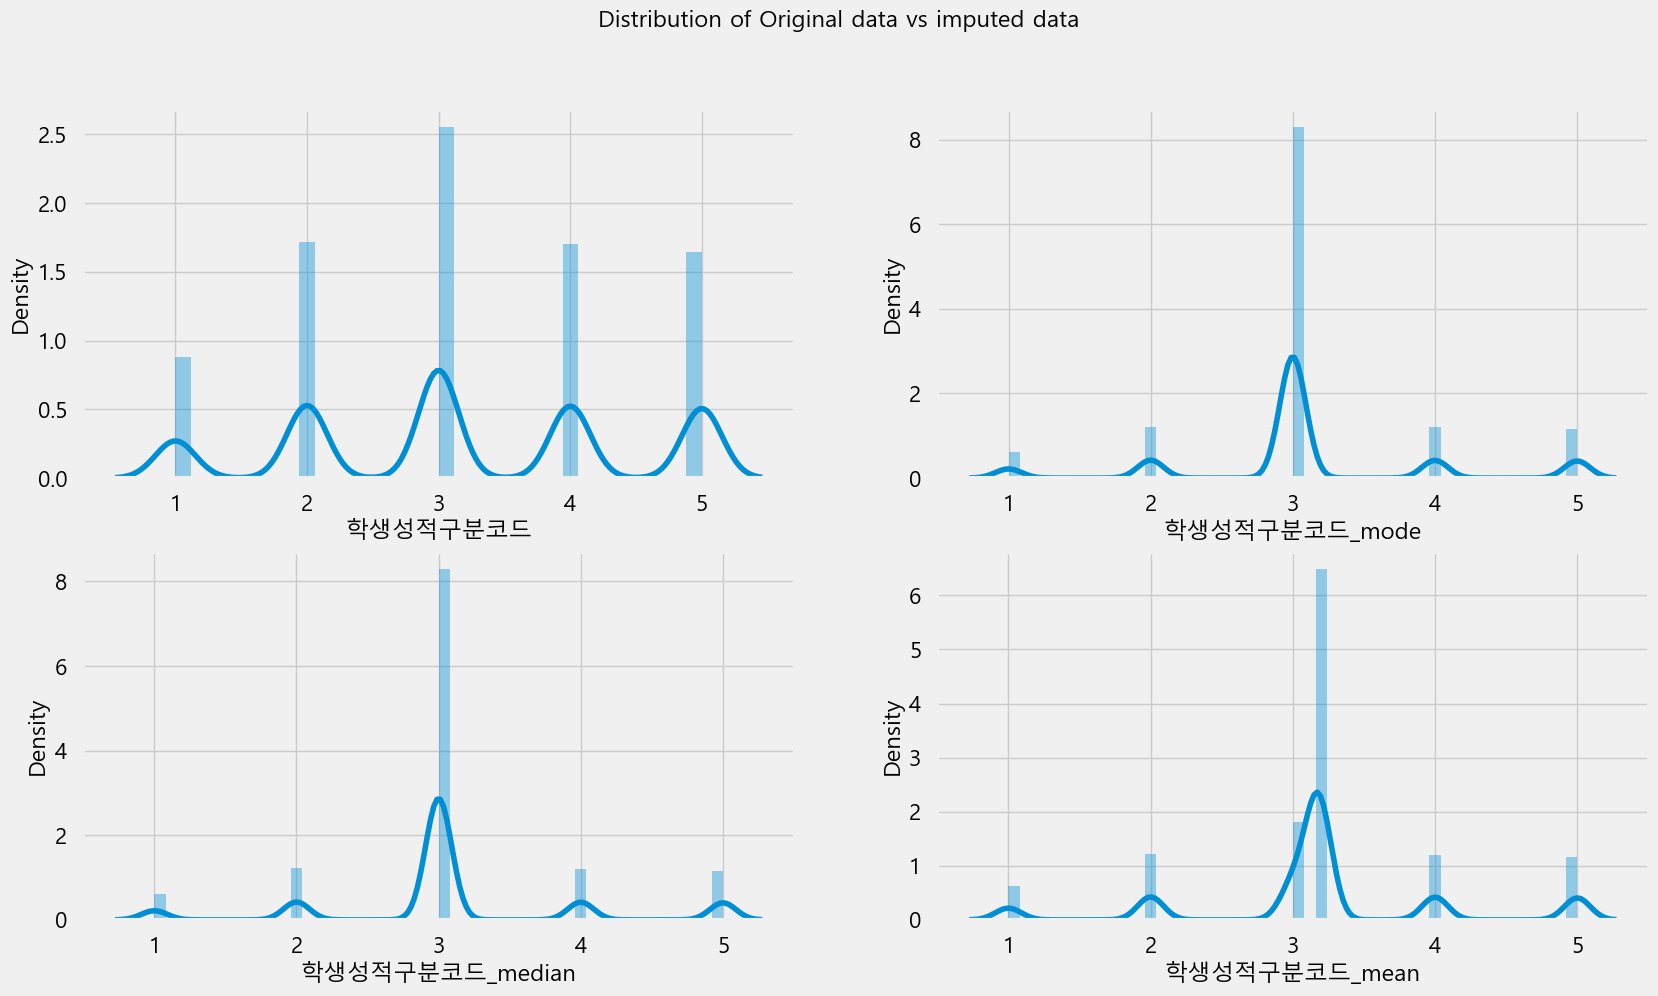

In [379]:
statsDF = pd.DataFrame() # new dataframe with columns imputed with mode, median and mean
statsDF['학생성적구분코드_mode'] = df['학생성적구분코드'].fillna(df['학생성적구분코드'].mode()[0])
statsDF['학생성적구분코드_median'] = df['학생성적구분코드'].fillna(df['학생성적구분코드'].median())
statsDF['학생성적구분코드_mean'] = df['학생성적구분코드'].fillna(df['학생성적구분코드'].mean())


cols = ['학생성적구분코드_mode', '학생성적구분코드_median','학생성적구분코드_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221) #221이 첫번째 original 기준으로 잡음
sns.distplot(df['학생성적구분코드'][pd.notnull(df['학생성적구분코드'])]);
for i in enumerate(cols):  #i값에는 2개의 값이 리스트로 반환 i[0]은 enumerage, i[1]은 칼럼 이름
    plt.subplot(2,2,i[0]+2) #2번째는 original을 1을 기준으로 주고 그 다음 것 부터 2,3,4...
    sns.distplot(statsDF[i[1]]) #i[1]은 컬럼의 이름, statsDF에는 ORIGINAL 안 들어있음

In [380]:
# 최빈값으로 채우기
df['학생성적구분코드'].fillna(df['학생성적구분코드'].mode()[0], inplace = True)
#mode를 하면 여러가지 값이 순서대로 나오는데 그중에서도 최빈 값인 [0]번째 값으로 값 채우기!

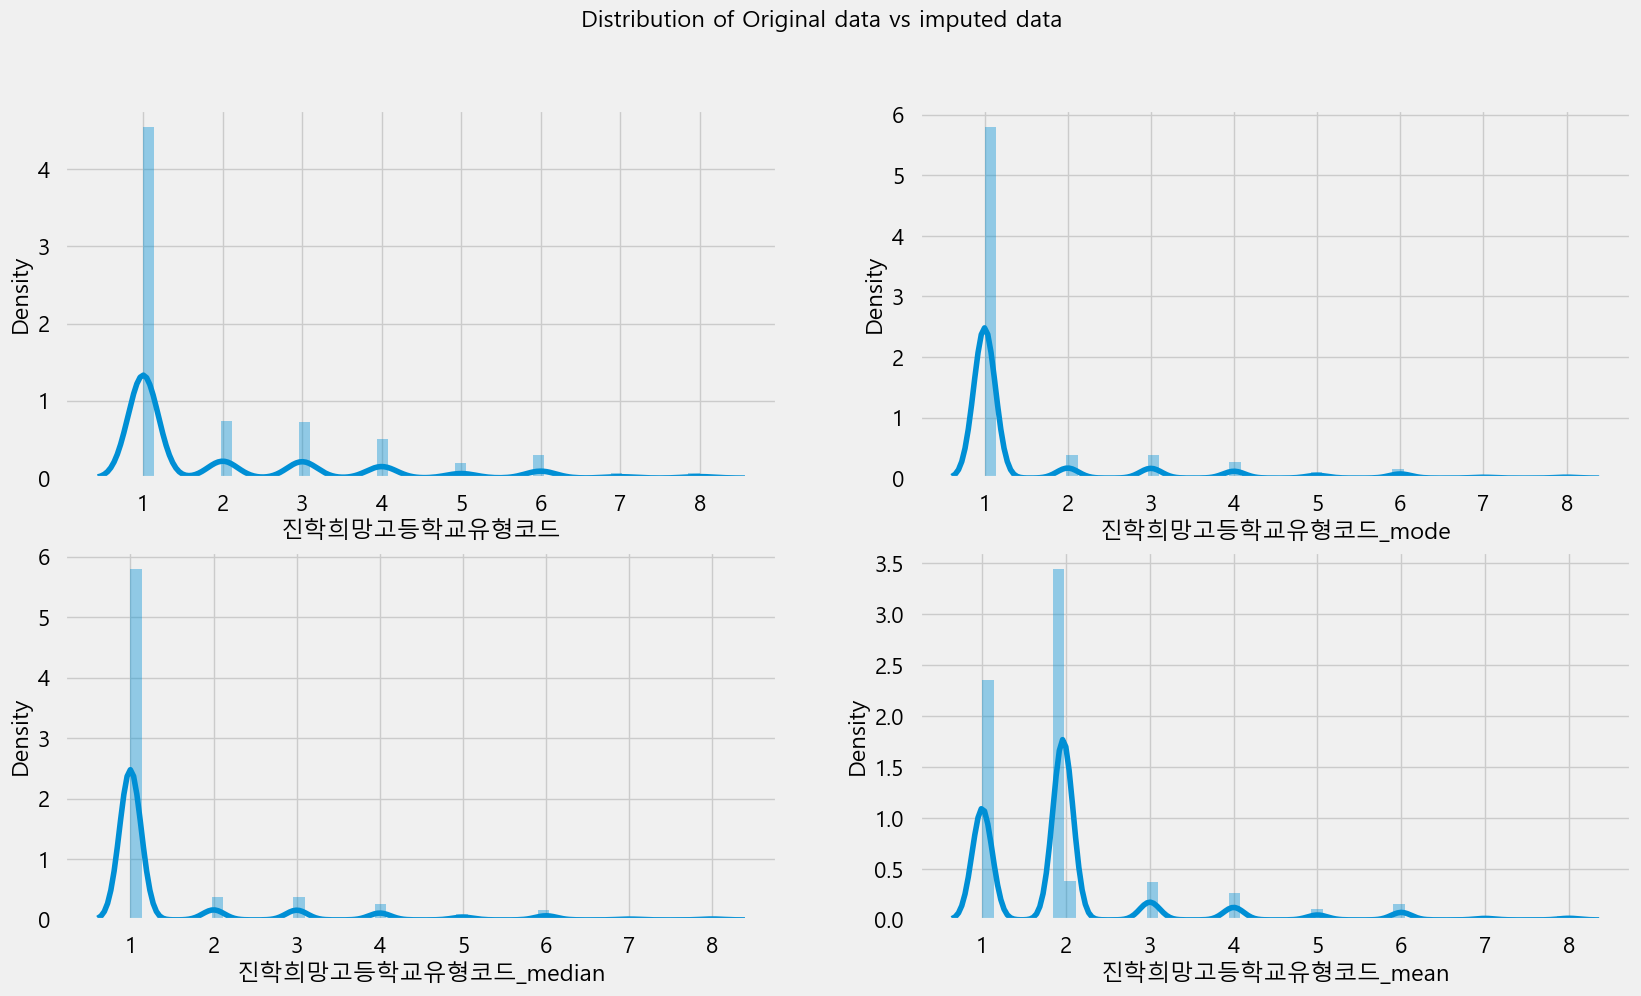

In [381]:
statsDF = pd.DataFrame() # new dataframe with columns imputed with mode, median and mean
statsDF['진학희망고등학교유형코드_mode'] = df['진학희망고등학교유형코드'].fillna(df['진학희망고등학교유형코드'].mode()[0])
statsDF['진학희망고등학교유형코드_median'] = df['진학희망고등학교유형코드'].fillna(df['진학희망고등학교유형코드'].median())
statsDF['진학희망고등학교유형코드_mean'] = df['진학희망고등학교유형코드'].fillna(df['진학희망고등학교유형코드'].mean())


cols = ['진학희망고등학교유형코드_mode', '진학희망고등학교유형코드_median','진학희망고등학교유형코드_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221) #221이 첫번째 original 기준으로 잡음
sns.distplot(df['진학희망고등학교유형코드'][pd.notnull(df['진학희망고등학교유형코드'])]);
for i in enumerate(cols):  #i값에는 2개의 값이 리스트로 반환 i[0]은 enumerage, i[1]은 칼럼 이름
    plt.subplot(2,2,i[0]+2) #2번째는 original을 1을 기준으로 주고 그 다음 것 부터 2,3,4...
    sns.distplot(statsDF[i[1]]) #i[1]은 컬럼의 이름, statsDF에는 ORIGINAL 안 들어있음

# 아래 null값들도 일단 median값으로 넣은 후에 모델 테스트 진행해보기

In [382]:
# 최빈값으로 채우기
df['진학희망고등학교유형코드'].fillna(df['진학희망고등학교유형코드'].mode()[0], inplace = True)
#mode를 하면 여러가지 값이 순서대로 나오는데 그중에서도 최빈 값인 [0]번째 값으로 값 채우기!

In [383]:
# 최빈값으로 채우기
df['부_교육정도코드'].fillna(df['부_교육정도코드'].mode()[0], inplace = True)
#mode를 하면 여러가지 값이 순서대로 나오는데 그중에서도 최빈 값인 [0]번째 값으로 값 채우기!

In [384]:
# 최빈값으로 채우기
df['모_교육정도코드'].fillna(df['모_교육정도코드'].mode()[0], inplace = True)
#mode를 하면 여러가지 값이 순서대로 나오는데 그중에서도 최빈 값인 [0]번째 값으로 값 채우기!

In [385]:
# 최빈값으로 채우기
df['부모경제활동코드'].fillna(df['부모경제활동코드'].mode()[0], inplace = True)
#mode를 하면 여러가지 값이 순서대로 나오는데 그중에서도 최빈 값인 [0]번째 값으로 값 채우기!

In [386]:
df.isnull().sum()

지역구분코드          0
행정구역시도코드        0
학교급구분코드         0
방과후학교참여여부       0
방과후학교참여시간수      0
EBS교재비          0
사교육참여시간수        0
일반교과사교육시간수      0
예체능사교육시간수       0
사교육비총비용         0
총자녀수            0
학생성적구분코드        0
부_교육정도코드        0
모_교육정도코드        0
부모경제활동코드        0
월평균가구소득코드       0
진학희망고등학교유형코드    0
dtype: int64

In [387]:
df.head()

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
0,1,11,1,1,0.333333,0.0,6.333333,4.333333,2.0,392.236071,2,3.0,51.0,31.0,1.0,5,1.0
1,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.0,0.000000,1,3.0,51.0,41.0,3.0,3,1.0
2,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.0,0.000000,1,3.0,61.0,51.0,1.0,6,1.0
3,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.0,0.000000,2,3.0,64.0,51.0,3.0,8,1.0
4,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.0,188.862467,3,3.0,51.0,51.0,3.0,4,1.0


In [388]:
X = df.drop(df.columns[9], axis=1)
y = df.iloc[:, 9]

In [389]:
X, y

(       지역구분코드  행정구역시도코드  학교급구분코드  방과후학교참여여부  방과후학교참여시간수  EBS교재비  사교육참여시간수  일반교과사교육시간수  예체능사교육시간수  총자녀수  학생성적구분코드  부_교육정도코드  모_교육정도코드  부모경제활동코드  월평균가구소득코드  진학희망고등학교유형코드
 0           1        11        1          1    0.333333     0.0  6.333333    4.333333        2.0     2       3.0      51.0      31.0       1.0          5           1.0
 1           1        11        1          1    0.666667     0.0  0.000000    0.000000        0.0     1       3.0      51.0      41.0       3.0          3           1.0
 2           1        11        1          1    0.666667     0.0  0.000000    0.000000        0.0     1       3.0      61.0      51.0       1.0          6           1.0
 3           1        11        1          1    0.666667     0.0  0.000000    0.000000        0.0     2       3.0      64.0      51.0       3.0          8           1.0
 4           1        11        1          1    0.666667     0.0  1.000000    0.000000        1.0     3       3.0      51.0      51.0       3.0          4 

In [390]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(45471, 16) (15157, 16) (15157, 16) (45471,) (15157,) (15157,)


In [391]:
print(X_train.info(), X.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45471 entries, 17862 to 61576
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역구분코드        45471 non-null  int64  
 1   행정구역시도코드      45471 non-null  int64  
 2   학교급구분코드       45471 non-null  int64  
 3   방과후학교참여여부     45471 non-null  int64  
 4   방과후학교참여시간수    45471 non-null  float64
 5   EBS교재비        45471 non-null  float64
 6   사교육참여시간수      45471 non-null  float64
 7   일반교과사교육시간수    45471 non-null  float64
 8   예체능사교육시간수     45471 non-null  float64
 9   총자녀수          45471 non-null  int64  
 10  학생성적구분코드      45471 non-null  float64
 11  부_교육정도코드      45471 non-null  float64
 12  모_교육정도코드      45471 non-null  float64
 13  부모경제활동코드      45471 non-null  float64
 14  월평균가구소득코드     45471 non-null  int64  
 15  진학희망고등학교유형코드  45471 non-null  float64
dtypes: float64(10), int64(6)
memory usage: 5.9 MB
None 지역구분코드          0
행정구역시도코드        0
학교급구분코드         0
방과후

In [392]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #
X_train_scaler = scaler.fit_transform(X_train)
X_val_scaler = scaler.fit_transform(X_val)
X_test_scaler = scaler.fit_transform(X_test)

In [393]:
X_train_scaler

array([[-0.65511838, -0.65440026,  0.72873149, ...,  0.75161533,
        -0.14148327, -0.40409898],
       [ 1.43760619,  0.74815922,  1.78355258, ...,  0.75161533,
        -0.14148327, -0.40409898],
       [-0.65511838, -0.18688044,  0.72873149, ..., -1.35604096,
        -0.14148327, -0.40409898],
       ...,
       [-0.65511838, -0.42064035, -1.38091068, ..., -1.35604096,
        -0.61410931, -0.40409898],
       [ 1.43760619,  1.332559  ,  0.72873149, ..., -1.35604096,
        -1.5593614 , -0.40409898],
       [ 1.43760619,  0.16375943, -1.38091068, ...,  0.75161533,
        -1.08673535,  0.40582673]])

In [394]:
from tarfile import XGLTYPE
#학습을 위한 라이브러리 세팅
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

#평가지표
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [395]:
#모델 훈련 함수
def train_models(X_train, y_train):
    models = {
        "LinearRegression": LinearRegression(),
        "XGBRegressor": XGBRegressor(),
        "LGBMRegressor": LGBMRegressor(),
        "RandomForestRegressor": RandomForestRegressor(),
        "CatBoostRegressor": CatBoostRegressor(verbose=0)  # verbose=0으로 설정하여 학습 중 메시지 출력을 최소화
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        models[name] = model

    return models


In [396]:
#train, val 시각화 함수
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# 결과 시각화 함수
def evaluate_regression_models(models, X_train, y_train, X_val, y_val):
    max_name_length = max([len(name) for name in models.keys()]) + 1  # 최대 모델 이름 길이 계산

    print("Model Performance Evaluation:\n")
    header = f"{'Model'.ljust(max_name_length)}\tTrain RMSE\tVal RMSE\tTrain MAE\tVal MAE\tTrain R²\tVal R²"
    print(header)
    print("-" * len(header))

    for name, model in models.items():
        pred_train = model.predict(X_train)
        pred_val = model.predict(X_val)

        rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
        rmse_val = np.sqrt(mean_squared_error(y_val, pred_val))
        mae_train = mean_absolute_error(y_train, pred_train)
        mae_val = mean_absolute_error(y_val, pred_val)
        r2_train = r2_score(y_train, pred_train)
        r2_val = r2_score(y_val, pred_val)

        print(f"{name.ljust(max_name_length)}\t{rmse_train:.4f}\t\t{rmse_val:.4f}\t\t{mae_train:.4f}\t\t{mae_val:.4f}\t\t{r2_train:.4f}\t\t{r2_val:.4f}")


In [397]:
#모델 test 평가 함수
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# train, val 시각화 함수
def plot_separated_metrics_for_regression_models(models, X_train, y_train, X_val, y_val):
    # 모델별 평가 지표 저장을 위한 리스트
    train_rmse_list = []
    val_rmse_list = []
    train_r2_list = []
    val_r2_list = []
    model_names = []

    # 각 모델별로 평가 지표 계산
    for name, model in models.items():
        train_pred = model.predict(X_train)
        val_pred = model.predict(X_val)

        # Check for invalid values
        if np.any(np.isnan(train_pred)) or np.any(np.isnan(val_pred)):
            print(f"Warning: The model {name} predicted NaN values")
            continue
        if not np.all(np.isfinite(train_pred)) or not np.all(np.isfinite(val_pred)):
            print(f"Warning: The model {name} predicted infinite values")
            continue

        train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_pred))
        train_r2 = r2_score(y_train, train_pred)
        val_r2 = r2_score(y_val, val_pred)

        train_rmse_list.append(train_rmse)
        val_rmse_list.append(val_rmse)
        train_r2_list.append(train_r2)
        val_r2_list.append(val_r2)
        model_names.append(name)

    # RMSE 결과 시각화
    plt.figure(figsize=(20, 10))  # 가로 사이즈 조정

    # 첫 번째 서브플롯 (RMSE)
    plt.subplot(2, 1, 1)  # 두 개의 행, 하나의 열의 첫 번째 서브플롯
    plt.plot(model_names, train_rmse_list, marker='o', label='Training RMSE')
    plt.plot(model_names, val_rmse_list, marker='o', label='Validation RMSE')
    plt.ylabel('RMSE')
    plt.title('Training and Validation RMSE for Different Models')
    plt.legend()

    # 두 번째 서브플롯 (R²)
    plt.subplot(2, 1, 2)  # 두 개의 행, 하나의 열의 두 번째 서브플롯
    plt.plot(model_names, train_r2_list, marker='o', label='Training R²')
    plt.plot(model_names, val_r2_list, marker='o', label='Validation R²')
    plt.ylabel('R²')
    plt.title('Training and Validation R² for Different Models')
    plt.legend()

    plt.tight_layout()  # 서브플롯 간격 조정
    plt.show()

In [410]:
#모델 훈련
from sklearn.metrics import accuracy_score, f1_score

# 모델 test 평가 함수
def evaluate_regression_models_on_test(models, X_test, y_test):
    max_name_length = max([len(name) for name in models.keys()]) + 1  # 최대 모델 이름 길이 계산

    print("Model Test Performance Evaluation:\n")
    header = f"{'Model'.ljust(max_name_length)}\tTest RMSE\tTest MAE\tTest R2"
    print(header)
    print("-----------------------------------------------------------------------------")

    for name, model in models.items():
        pred_test = model.predict(X_test)

        mse_test = mean_squared_error(y_test, pred_test)
        rmse_test = mse_test ** 0.5
        mae_test = mean_absolute_error(y_test, pred_test)
        r2_test = r2_score(y_test, pred_test)

        print(f"{name.ljust(max_name_length)}\t{rmse_test:.4f}\t\t{mae_test:.4f}\t\t{r2_test:.4f}")


In [399]:
#모델 훈련
models = train_models(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 707
[LightGBM] [Info] Number of data points in the train set: 45471, number of used features: 16
[LightGBM] [Info] Start training from score 347.023979


In [400]:
#모델 성능평가
evaluate_regression_models(models, X_train, y_train, X_val, y_val)

Model Performance Evaluation:

Model                 	Train RMSE	Val RMSE	Train MAE	Val MAE	Train R²	Val R²
----------------------------------------------------------------------------
LinearRegression      	251.8621		252.4406		166.1962		166.5419		0.6179		0.6145
XGBRegressor          	170.5605		210.7517		98.8870		117.9906		0.8248		0.7313
LGBMRegressor         	191.5391		206.8817		108.9649		115.4954		0.7790		0.7411
RandomForestRegressor 	80.9451		215.1515		44.6538		119.1711		0.9605		0.7200
CatBoostRegressor     	181.7696		206.5439		105.6894		116.3211		0.8010		0.7420


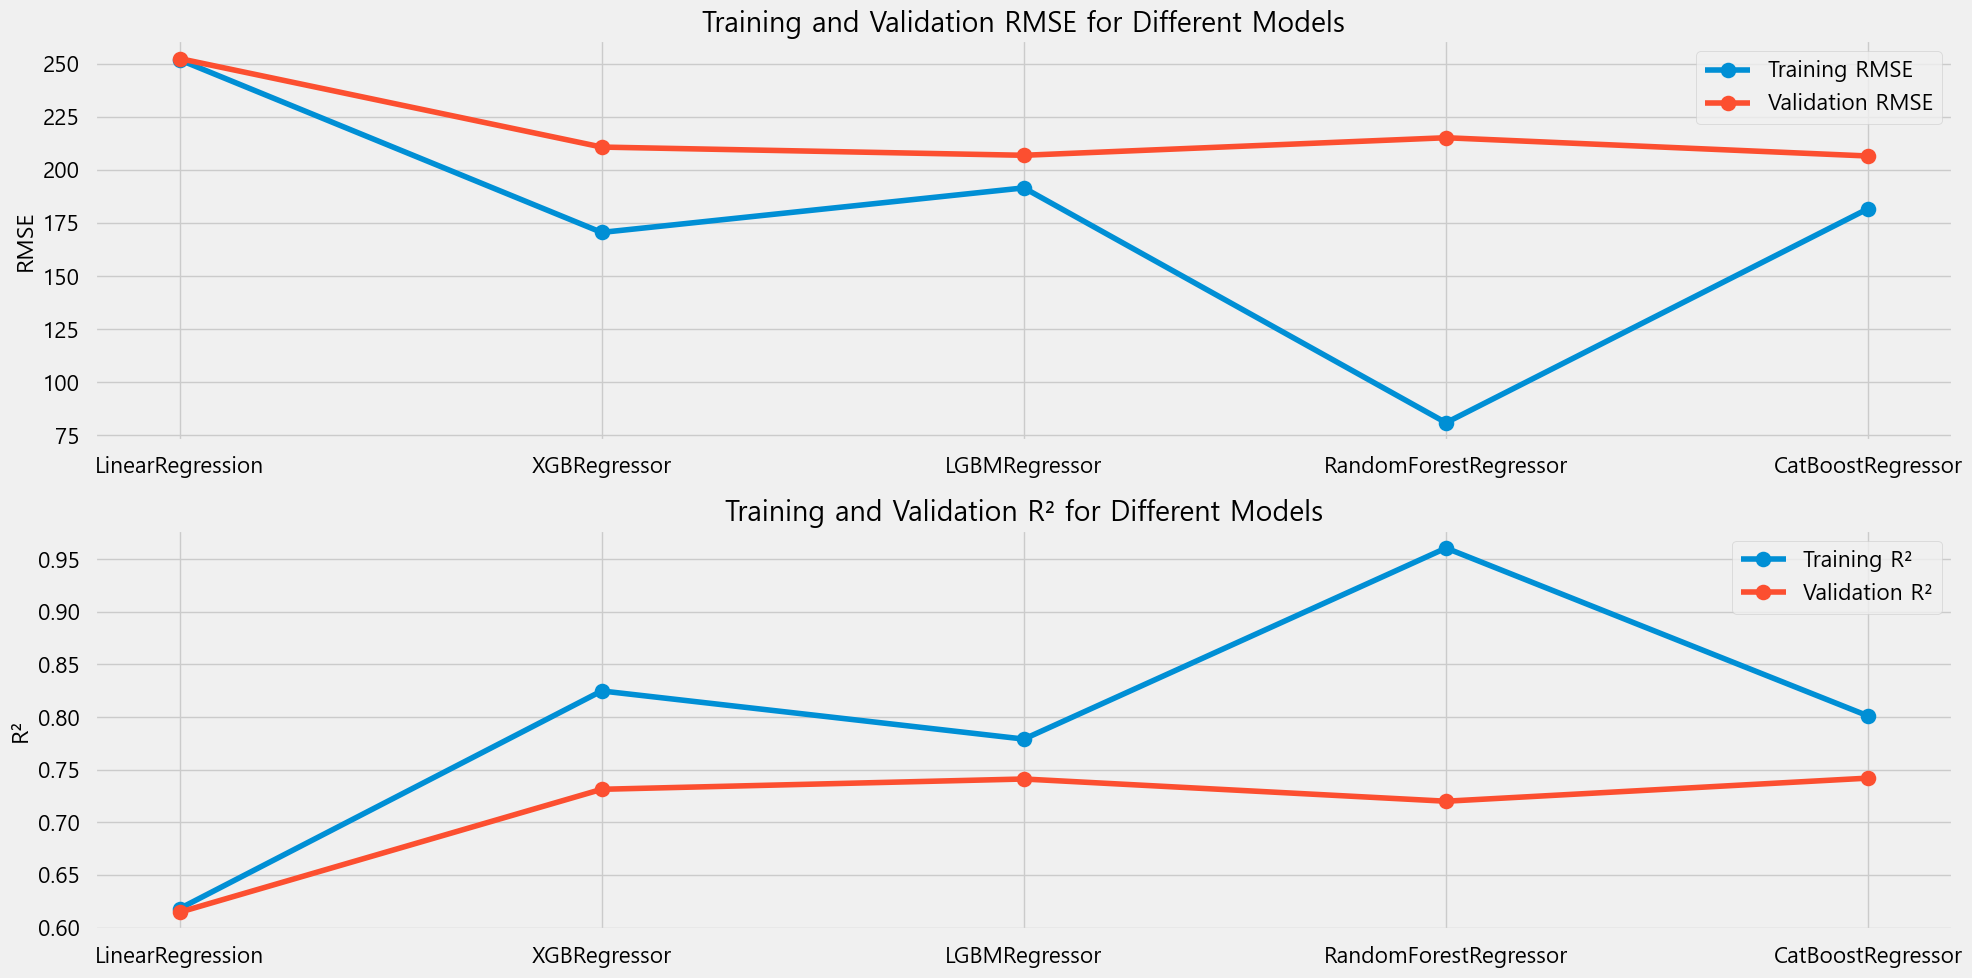

In [401]:
#결과 시각화
plot_separated_metrics_for_regression_models(models, X_train, y_train, X_val, y_val)

# 결과 해석
- 랜덤포레스트 -오버피팅
- linerRegression - 언더피팅
- Lgbm, Xgboost, Catboost 괜찮은 것 같음

In [411]:
#모델 test평가
evaluate_regression_models_on_test(models, X_test, y_test)

Model Test Performance Evaluation:

Model                 	Test RMSE	Test MAE	Test R2
-----------------------------------------------------------------------------
LinearRegression      	249.1459		164.3089		0.6234
XGBRegressor          	214.0246		118.6219		0.7221
LGBMRegressor         	207.4705		114.9412		0.7388
RandomForestRegressor 	214.7653		119.1796		0.7201
CatBoostRegressor     	208.3420		116.6560		0.7366


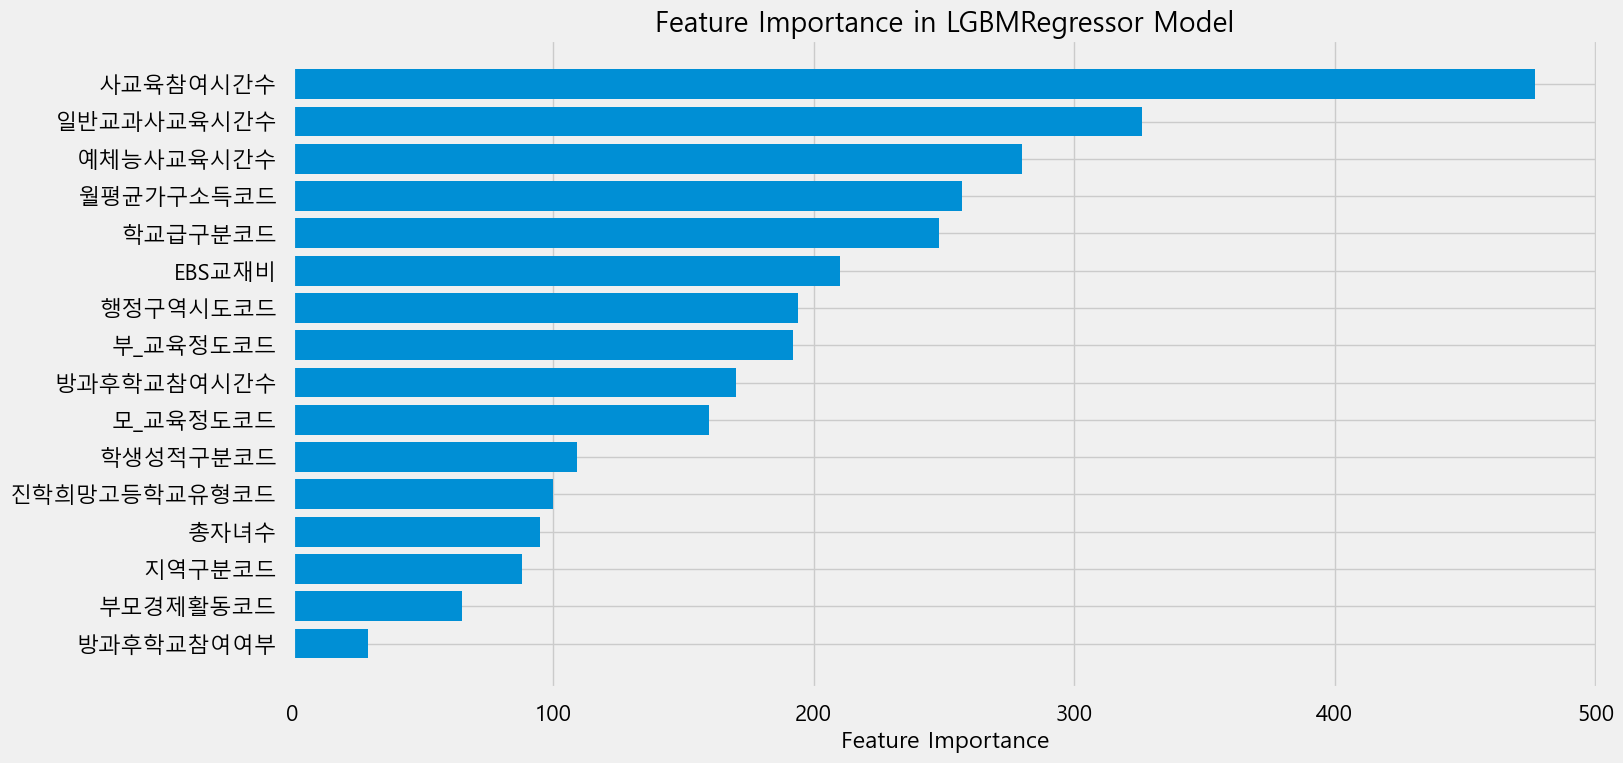

In [414]:
import matplotlib.pyplot as plt

# Assuming catboost_model is actually an instance of LGBMRegressor
lgbm_model = models['LGBMRegressor']

# Get feature importances from the model
feature_importances = lgbm_model.feature_importances_
sorted_idx = np.argsort(feature_importances)

# Get the feature names
features = X_train.columns[sorted_idx]

# Visualize the feature importances
plt.figure(figsize=(15, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in LGBMRegressor Model')
plt.show()


# early stop, 앙상블, autoMl, 최적의 파라미터 찾기는 나중에...

## [최종정리]
- 전반적으로 EDA를 세부적으로는 하지 않았습니다. Tree모델을 사용하니 알아서 잡아주기 때문에, 다만 성능을 더 높이고 싶다면 feature importance에서 관계가 높은 feature 위주로 세부적인 eda 진행하기
(사실 feature importance가 큰 효과는 없지만..실험을 해보면서 진행해보기)

[나중]
- 모델 앙상블을 활용하여 오차 최소화 하기
- 간단한 AutoMl, 다양한 실험을 통해서 최적의 하이퍼 파라미터 찾기

